# Titanic: Machine Learning from Disaster

### To analyze what sorts of people were likely to survive the tragedy



This process of analysis involves:

1. Loading the training and test dataset
2. Exploratory data analysis: 
   Getting to know the data: fields, type of data, the trends/averages, missing data, outliers, correlation between      fields etc
3. Data Wrangling:
   Imputing missing values, creating dummy features, correcting fields, changing fields to numeric
4. Visualization:
   Using graphs and plots to get a clear picture of the trends in support of insights and analysis
5. Feature Engineering
6. Modelling
7. Testing
8. Conclusion

In [1]:
#dataframes and computation
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the train and test dataset

Downladed from Kaggle: https://www.kaggle.com/c/titanic/data

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]

### Exploratory data analysis

First look at what the dataset looks like: Different fields/columns, the type of data in each column

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Dictionary

- Survived: 0 = No, 1 = Yes (Categorical:Numeric)
- Sex: male, female (Categorical:non-numeric)
- Pclass: 1 = Ticket class 1, 2 = Ticket class 2, 3 = Ticket class 3 (Categorical:Numeric)
- SibSp: # of siblings / spouses aboard the Titanic (Numerical:Discrete)
- Parch: # of parents / children aboard the Titanic (Numerical:Discrete)
- Ticket: Ticket number (AlphaNumeric)
- Cabin: Cabin number (Alphanumeric)
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton (Categorical:non-numeric)
- Age (numeric:continuous)
- Fare (numeric:continuous)

More information on the dataset as a whole:

- The number of rows/entries
- The number of columns/fields
- Which fields have missing values

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Which columns and how many in each column has to be filled in with missing values?

Are the number of missing fields too many to be of good use in the analysis?

In [7]:
s = train_df.isnull().sum()
train_df.isnull().sum()[s.nonzero()[0]]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
s = test_df.isnull().sum()
test_df.isnull().sum()[s.nonzero()[0]]

Age       86
Fare       1
Cabin    327
dtype: int64

Numbers at a glace, for numeric columns:

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kraeff, Mr. Theodor",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


Cabin has too many missing values(687/891), and it repeats as well (people shared cabins). Might not be of much use.

Lets look at the correlation between some columns with their survival.

In [11]:
train_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
def correlate_bar(feature):
    survived = train_df[train_df['Survived'] == 1][feature].value_counts()
    dead = train_df[train_df['Survived'] == 0][feature].value_counts()
    bar_df = pd.DataFrame([survived, dead], index=['Survived', 'Dead'])
    bar_df.T.plot.bar(stacked=True, figsize=(6,5))

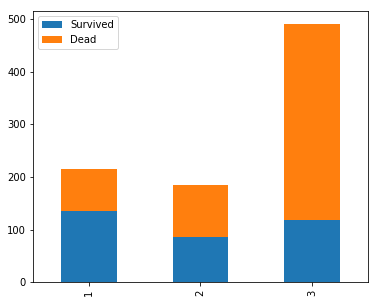

In [13]:
correlate_bar('Pclass')

Close to 63% of people in class 1 survived, where as only 24% from class 3. 

In [14]:
train_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


74% of the females survived, whereas only 19% of the males did. Sex has strong correlation with survival in favor of females.

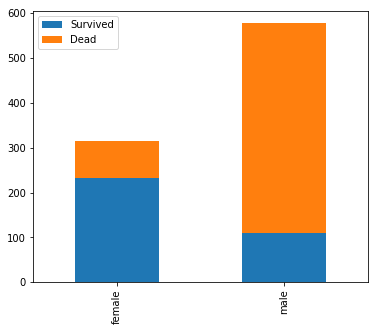

In [15]:
correlate_bar('Sex')

In [16]:
train_df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Those who boarded with two or more siblings or spouse more likely to survive. Those who were alone most likely to die.


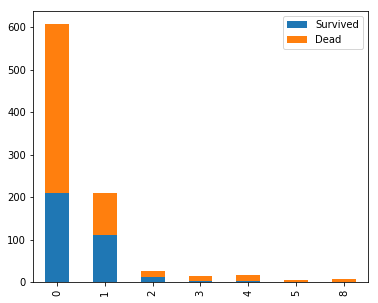

In [17]:
correlate_bar('SibSp')

In [18]:
train_df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Those who boarded with two or more parents or children more likely to survive. Those who were alone most likely to die.

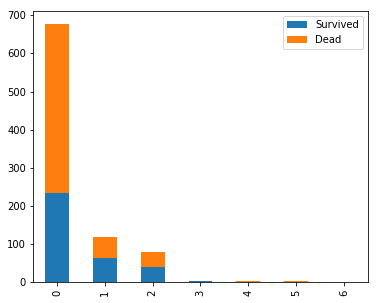

In [19]:
correlate_bar('Parch')

In [20]:
train_df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Those who boarded from C, most likely survived.

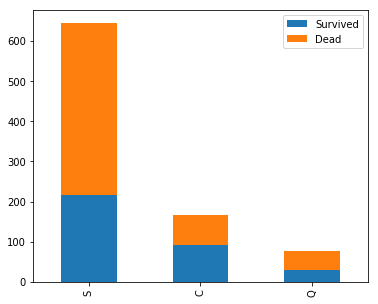

In [21]:
correlate_bar('Embarked')

In [22]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [23]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'], dtype=object)

### Feature Engineering

Using the domain knowledge, create features that help us create a better model and insight with the data.

#### 1. Name
Name doesnt really seem helpful but it contains Titles which relates with Age and Sex and hence might be useful. 

In [24]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Capt          1
Don           1
Mme           1
Jonkheer      1
Sir           1
Countess      1
Lady          1
Name: Title, dtype: int64

In [25]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.347826


In [27]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [28]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [29]:
combine[0].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,3
2,3,1,3,female,26.0,0,0,7.9250,S,2
3,4,1,1,female,35.0,1,0,53.1000,S,3
4,5,0,3,male,35.0,0,0,8.0500,S,1


#### 2. Embarked

There are some missing values of Embarked. How best to fill that up? Is there any correlation between Pclass and Embarked?

Class 1    0.593458
Class 2    0.891304
Class 3    0.718941
dtype: float64

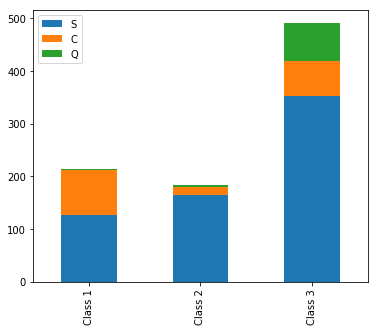

In [30]:
Pclass1 = train_df[train_df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_df[train_df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_df[train_df['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3], index=['Class 1', 'Class 2', 'Class 3'])
df.plot.bar(figsize=(6,5), stacked=True)
df['S']/df.sum(axis=1)

Since there is more than 59% chance that they boarded from S in the least case, we shall fill up missing values with S.

In [31]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [32]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

#### 3. Sex

In [33]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female' : 0, 'male' : 1}).astype(int)

In [34]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,3
2,3,1,3,0,26.0,0,0,7.9250,0,2
3,4,1,1,0,35.0,1,0,53.1000,0,3
4,5,0,3,1,35.0,0,0,8.0500,0,1


#### 4. Age

In [35]:
s = train_df.isnull().sum()
train_df.isnull().sum()[s.nonzero()[0]]

Age    177
dtype: int64

Fill the missing age values with median age of the title in their name.

In [36]:
for dataset in combine:
    dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'), inplace=True)

In [37]:
s = test_df.isnull().sum()
test_df.isnull().sum()[s.nonzero()[0]]

Fare    1
dtype: int64

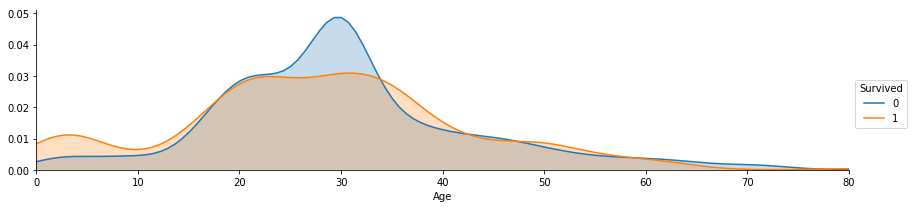

In [38]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
 
plt.show()

(0, 18)

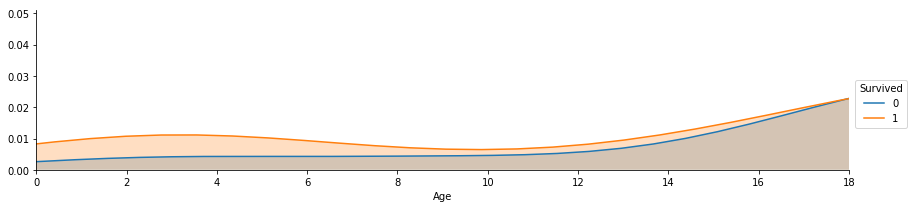

In [39]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.xlim(0, 18)

(18, 34)

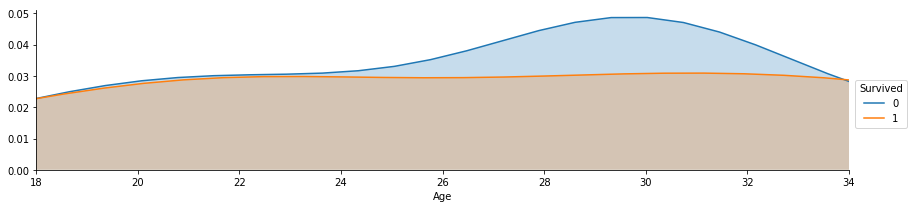

In [40]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.xlim(18, 34)

(34, 43)

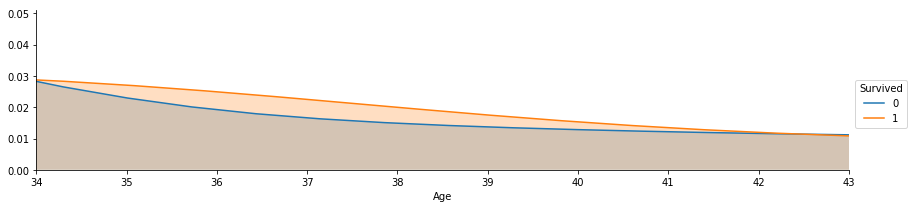

In [41]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.xlim(34, 43)

(43, 60)

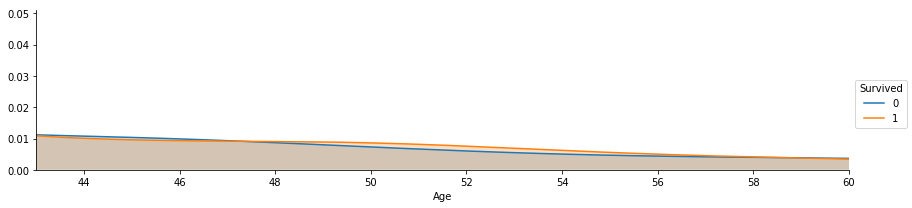

In [42]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.xlim(43, 60)

(60, 80)

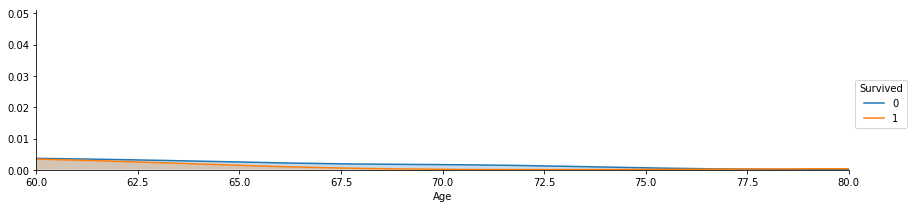

In [43]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.xlim(60, 80)

Convert the continuous numerical age to categories by binning.

In [44]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.327345
2,"(32.252, 48.168]",0.439024
3,"(48.168, 64.084]",0.428571
4,"(64.084, 80.0]",0.090909


In [45]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,1,1,1,0,7.2500,0,1,"(16.336, 32.252]"
1,2,1,1,0,2,1,0,71.2833,1,3,"(32.252, 48.168]"
2,3,1,3,0,1,0,0,7.9250,0,2,"(16.336, 32.252]"
3,4,1,1,0,2,1,0,53.1000,0,3,"(32.252, 48.168]"
4,5,0,3,1,2,0,0,8.0500,0,1,"(32.252, 48.168]"


In [46]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,1,1,0,7.2500,0,1
1,2,1,1,0,2,1,0,71.2833,1,3
2,3,1,3,0,1,0,0,7.9250,0,2
3,4,1,1,0,2,1,0,53.1000,0,3
4,5,0,3,1,2,0,0,8.0500,0,1


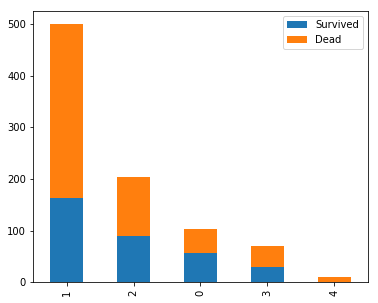

In [47]:
correlate_bar('Age')

Children (age <= 16) more likely survived.

#### 5. FamilySize/IsAlone

In [48]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [49]:
"""
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
"""

"\nfor dataset in combine:\n    dataset['IsAlone'] = 0\n    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1\n\ntrain_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()\n"

In [50]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in combine:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [51]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,1,1,7.2500,0,1,0.4
1,2,1,1,0,2,71.2833,1,3,0.4
2,3,1,3,0,1,7.9250,0,2,0.0
3,4,1,1,0,2,53.1000,0,3,0.4
4,5,0,3,1,2,8.0500,0,1,0.0


#### 6. Fare

Fill the missing value with the median fare for the ticket class. Create bins and make it categorical.

In [52]:
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [53]:
s = test_df.isnull().sum()
test_df.isnull().sum()[s.nonzero()[0]]

Series([], dtype: int64)

In [54]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


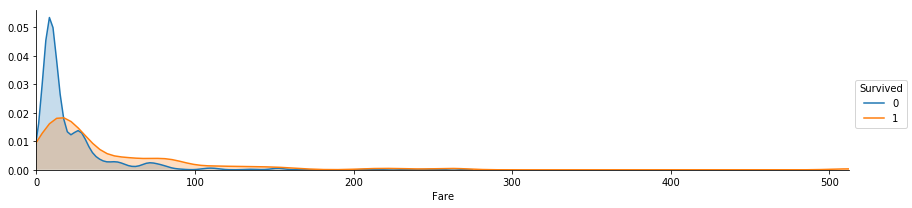

In [55]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
 
plt.show()

(0, 17)

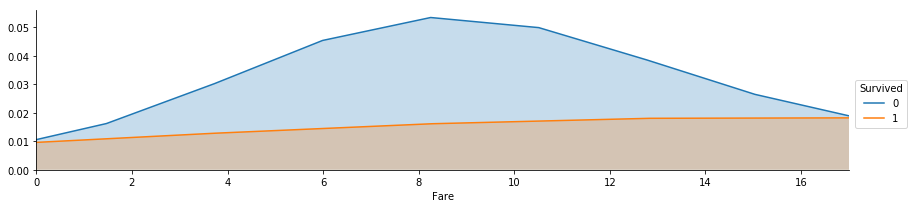

In [56]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
plt.xlim(0, 17)

(17, 30)

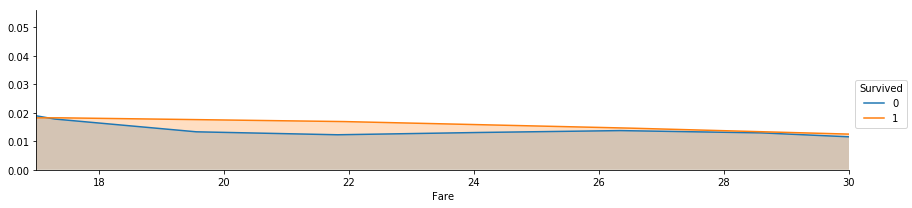

In [57]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
plt.xlim(17, 30)

(30, 512.3292)

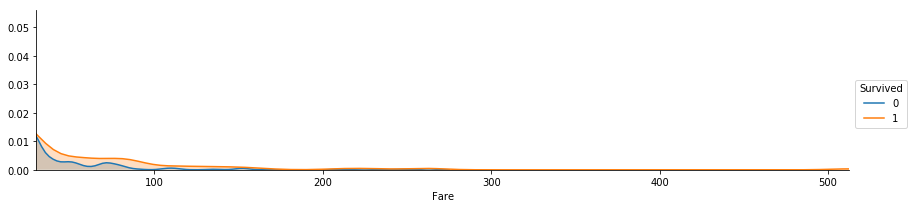

In [58]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
plt.xlim(30,)

In [59]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Class
0,1,0,3,1,1,0,0,1,0.4,3
1,2,1,1,0,2,3,1,3,0.4,2
2,3,1,3,0,1,1,0,2,0.0,3
3,4,1,1,0,2,3,0,3,0.4,2
4,5,0,3,1,2,1,0,1,0.0,6
5,6,0,3,1,1,1,2,1,0.0,3
6,7,0,1,1,3,3,0,1,0.0,3
7,8,0,3,1,0,2,0,4,1.6,0
8,9,1,3,0,1,1,0,3,0.8,3
9,10,1,2,0,0,2,1,3,0.4,0


In [60]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Class
0,892,3,1,2,0,2,1,0.0,6
1,893,3,0,2,0,0,3,0.4,6
2,894,2,1,3,1,2,1,0.0,6
3,895,3,1,1,1,0,1,0.0,3
4,896,3,0,1,1,0,3,0.8,3
5,897,3,1,0,1,0,1,0.0,0
6,898,3,0,1,0,2,2,0.0,3
7,899,2,1,1,2,0,1,0.8,2
8,900,3,0,1,0,1,3,0.0,3
9,901,3,1,1,2,0,1,0.8,3


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null int64
Fare           891 non-null int64
Embarked       891 non-null int64
Title          891 non-null int64
FamilySize     891 non-null float64
Age*Class      891 non-null int64
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
Fare           418 non-null int64
Embarked       418 non-null int64
Title          418 non-null int64
FamilySize     418 non-null float64
Age*Class      418 non-null int64
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


In [63]:
train_data = train_df.drop(['Survived', 'PassengerId'], axis=1)
target = train_df['Survived']

train_data.shape, target.shape

((891, 8), (891,))

### Modelling

In [64]:
#importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [65]:
#cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

#### 1. Logistic Regression

In [66]:
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.7752809  0.84269663 0.73033708 0.86516854 0.83146067
 0.78651685 0.74157303 0.78651685 0.8988764 ]


In [67]:
round(np.mean(score)*100, 2)

80.58

#### 2. kNN

In [68]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.82022472 0.82022472 0.75280899 0.83146067 0.87640449
 0.78651685 0.79775281 0.7752809  0.8988764 ]


In [69]:
round(np.mean(score)*100, 2)

81.93

#### 3. Decision Tree

In [70]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.84269663 0.75280899 0.78651685 0.83146067 0.85393258
 0.79775281 0.79775281 0.82022472 0.87640449]


In [71]:
round(np.mean(score)*100, 2)

82.15

#### 4. Random Forest

In [72]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.86516854 0.76404494 0.79775281 0.82022472 0.86516854
 0.80898876 0.7752809  0.83146067 0.87640449]


In [73]:
round(np.mean(score)*100, 2)

82.38

#### 5. Naive Bayes

In [74]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.78651685 0.79775281 0.75280899 0.80898876 0.82022472
 0.7752809  0.78651685 0.75280899 0.86516854]


In [75]:
round(np.mean(score)*100, 2)

79.24

#### 6. Support vector machine

In [76]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.80898876 0.76404494 0.84269663 0.86516854
 0.79775281 0.79775281 0.76404494 0.8988764 ]


In [77]:
round(np.mean(score)*100, 2)

81.7

In [78]:
train_data.shape, test_df.shape

((891, 8), (418, 9))

### Test and submit

Picked the classifier showing highest accuracy in cross validation : Random forest. Using it to predict for test data set.

In [79]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data = test_df.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [80]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [81]:
submission = pd.read_csv('submission.csv')
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### Conclusion

Learnt the steps through my first ever data analysis, with lots of help of course. Got a score of 0.78947 on kaggle, 3326th position of the 9868 teams ongoing at the time on a rolling basis.

## References

- https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb
- https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook